# ROADMAP
1. Download and open dataset
2. Plot out quantity of values per column (pie/bar chart)
3. 

## 1. Download/Open Dataset

We will use a Kaggle dataset which can be downloaded using the *kagglehub* library.

To install the kagglehub library, run `!pip install kagglehub` from a Python cell in this notebook.

In [1]:
import pathlib
import kagglehub

In [2]:
dataset_path = pathlib.Path.joinpath(pathlib.Path.cwd(), "data")
dataset_path

PosixPath('/home/poiboi/Coding/pytorch/ESSENTIALS/data')

In [3]:
current_path = kagglehub.dataset_download("sophiahealy/genshin-impact-character-data")
print(f"Dataset is currently located at {current_path}")

Dataset is currently located at /home/poiboi/.cache/kagglehub/datasets/sophiahealy/genshin-impact-character-data/versions/11


In [4]:
# move the dataset to the desired path
try:
    ds_file = next(pathlib.Path(current_path).glob("*genshin*.csv"))
    ds_file = ds_file.replace(dataset_path / ds_file.name)
except StopIteration: # no files found there, was already downloaded
    ds_file = next(pathlib.Path(dataset_path).glob("*genshin*.csv"))

After downloading the dataset, we now need to open it up and see what we're dealing with

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(ds_file, encoding="ISO-8859-1") # cant parse in utf-8

In [7]:
df.head(5)

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,...,1030,20,68,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,...,1039,24,60,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Aloy,5,NaN,Cryo,NaN,Bow,Medium Female,Nora Fortis,4-Apr,Satiety Gel,...,848,18,53,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,...,793,19,50,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,1-Jun,Way of the Strong,...,1001,18,75,0.0%,0.0%,4.8%,9.6%,9.6%,14.4%,19.2%


In [8]:
df.columns

Index(['character_name', 'rarity', 'region', 'vision', 'arkhe', 'weapon_type',
       'model', 'constellation', 'birthday', 'special_dish', 'affiliation',
       'release_date', 'limited', 'voice_eng', 'voice_cn', 'voice_jp',
       'voice_kr', 'ascension', 'ascension_specialty', 'ascension_material',
       'ascension_boss', 'talent_material', 'talent_book_1-2',
       'talent_book_2-3', 'talent_book_3-4', 'talent_book_4-5',
       'talent_book_5-6', 'talent_book_6-7', 'talent_book_7-8',
       'talent_book_8-9', 'talent_book_9-10', 'talent_weekly', 'hp_90_90',
       'atk_90_90', 'def_90_90', 'hp_80_90', 'atk_80_90', 'def_80_90',
       'hp_80_80', 'atk_80_80', 'def_80_80', 'hp_70_80', 'atk_70_80',
       'def_70_80', 'hp_70_70', 'atk_70_70', 'def_70_70', 'hp_60_70',
       'atk_60_70', 'def_60_70', 'hp_60_60', 'atk_60_60', 'def_60_60',
       'hp_50_60', 'atk_50_60', 'def_50_60', 'hp_50_50', 'atk_50_50',
       'def_50_50', 'hp_40_50', 'atk_40_50', 'def_40_50', 'hp_40_40',
       'a

## 2. Plot out quantity of values per column (pie/bar chart)

It would be useful to see what the majority of our data is being represented as.

Small lesson: Difference between using graphs

* Line Graph - Shows change in data over time (between two variables)
  * Good for illustrating trends
* Bar Graph - Shows comparisons between multiple values (variables)
  * Good for emphasizing the quantity of certain values
* Histogram - Shows distribution of data throughout multiple values (variables)
  * Good for determining what categories belong to what set of ranges (e.g., what is commonplace)
* Scatter Plot - Shows relationship between two variables when fluctuation in data points are present
  * Usually done when correlation between variables is not easily identifiable (not continuous)
* Pie Chart - Shows the different parts that make up one variable
  * Good for addressing majority and minority categories of one variable
* Heatmap - Shows most prominent presence of data in a grid
  * Good for illustrating data density but only with small datasets

In [9]:
# we need to aggregate all unique values and get their sums to graph
df["rarity"].value_counts()

rarity
5    47
4    37
Name: count, dtype: int64

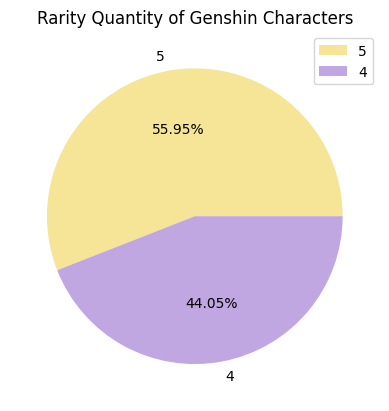

In [10]:
# let's see what the characters' rarities are in a pie chart to see the distribution
num_unique = df["rarity"].value_counts() # sums the unique values into a series

fig, ax = plt.subplots()

ax.set_title("Rarity Quantity of Genshin Characters")

ax.pie(
    num_unique, # the samples
    labels=num_unique.index, # categorize based on the values given
    autopct="%1.2f%%", # format the percentage as the following
    colors=["#F6E597", "#C0A7E1"] # colors are used in descending order of values
)

ax.legend() # extra diagram to show just in case

plt.show()

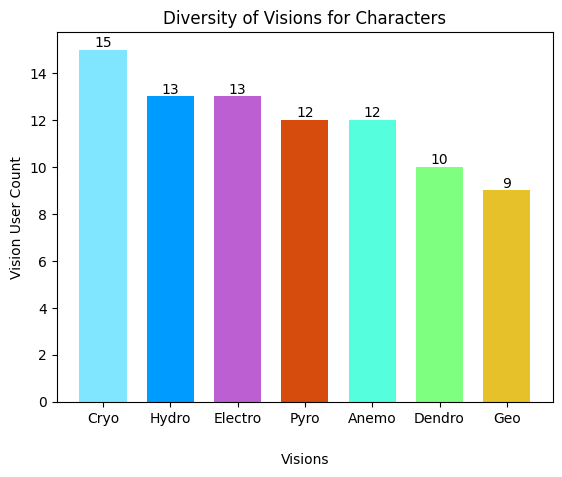

In [11]:
# lets try comparing their visions on avg
unique_visions = df["vision"].value_counts()

# set colors and adjust ordering based on descending majority in qty
color_scheme = {
    "Cryo": "#80E5FF",
    "Hydro": "#009BFF",
    "Electro": "#BC5FD3",
    "Pyro": "#D54C0C",
    "Anemo": "#55FFDD",
    "Dendro": "#7FFF7F",
    "Geo": "#E7C129"
}
colors = [color_scheme[column] for column in unique_visions.index]

fig, ax = plt.subplots()
ax.set_title("Diversity of Visions for Characters")
ax.set_xlabel("Visions", labelpad=20) # add spacing between label
ax.set_ylabel("Vision User Count")

bar_graph = ax.bar(
    unique_visions.index, # positioning, idk how this works
    height=unique_visions.values, # correspond each vision to their value
    width=0.7, # bar width
    color=colors
)

ax.set_xticks(range(len(unique_visions))) # set number of ticks
ax.set_xticklabels(unique_visions.index) # set the title of each tick

plt.bar_label(
    bar_graph,
    labels=unique_visions.values, # i want to see the actual count of the vision users
    label_type="edge" # i want the number at the top of the bar
)

plt.show() # to avoid extra background processes before displaying in notebook

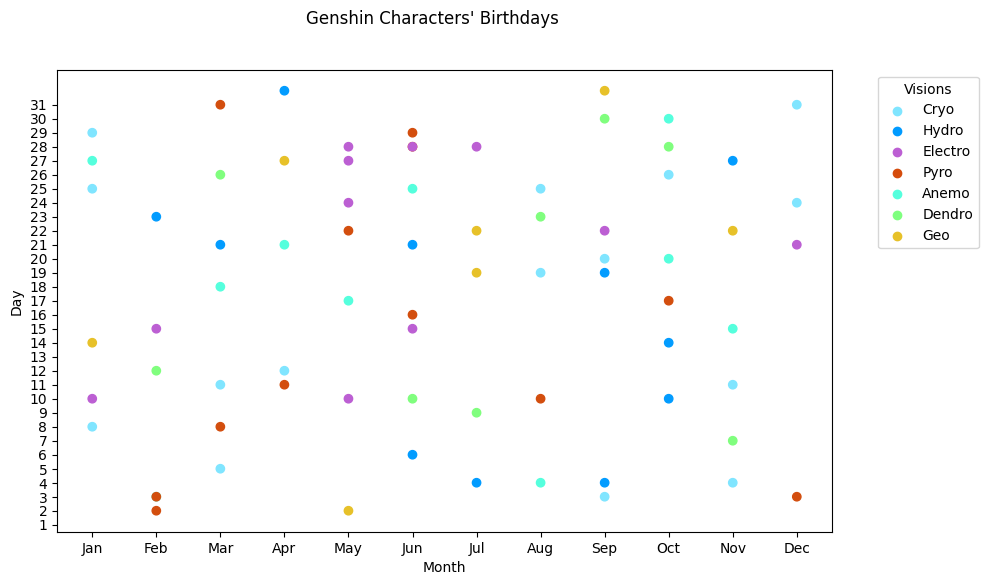

In [ ]:
import calendar
from matplotlib.colors import LinearSegmentedColormap

# what about their birthday_series?
# we need to convert months -> numbers to graph

MONTHS = list(calendar.month_abbr[1:]) # first element is blank string

vision_encoding = {v:k for k, v in enumerate(color_scheme.keys())} # vision, number

# to_dict converts to enumerated dict...
# filter birthday_series to have dates after separation and not be "player's choice"
info = df[["vision", "birthday"]].where((df["birthday"].str.split("-").str.len() == 2))
birthday_series = info["birthday"].str.split("-").to_list() # could have some nulls due to split
vision_series = info[info["vision"].apply(lambda vision: isinstance(vision, str))]["vision"].to_list()

# data of character's months/days from bday
# DO NOT SORT unless sorting 3 lists at once, the order is preserved for each list's element to correspond on index
visions = list(map(lambda vision: vision_encoding[vision], vision_series))
months = [date[1] for date in birthday_series if isinstance(date, list) and isinstance(date[1], str)]
days = [int(date[0]) for date in birthday_series if isinstance(date, list) and isinstance(date[0], str)]

vision_cmap = LinearSegmentedColormap.from_list("genshin_visions", list(color_scheme.values())) # needed since adjusting colors to x-axis values no longer has colors option

plt.figure(figsize=(10, 6))

plt.suptitle("Genshin Characters' Birthdays")
plt.xlabel("Month")
plt.ylabel("Day")

# num ticks, reference to ticks (data range)
plt.xticks(range(12), MONTHS)
plt.yticks(range(31), range(1, 32)) # adjust y-axis values to ascend

plt.scatter(
    months,
    days,
    c=visions, # color based on x-axis value, list is full of numeric equivalents of months
    cmap=vision_cmap # or "genshin_visions"
)

# collect colors in legend format
# this simply just maps name to color and doesnt actually associate with the datapoints
legend_elements = [plt.scatter([], [], c=color, label=element) for element, color in color_scheme.items()]

plt.legend(
    handles=legend_elements,
    title="Visions",
    bbox_to_anchor=(1.05, 1), # put outside of graph
    loc="upper left"
)

plt.show()